## Hypothesis Testing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/korla/Desktop/github my account/Machine Learning/Naive baye's/student.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
integers = df._get_numeric_data()

In [8]:
integers.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


## correlation

In [9]:
integers.corr(method='pearson')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [10]:
integers.corr(method='spearman')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.662477,0.652523,0.337573
VisITedResources,0.662477,1.000000,0.572715,0.207649
AnnouncementsView,0.652523,0.572715,1.000000,0.402448
Discussion,0.337573,0.207649,0.402448,1.000000


<IPython.core.display.Javascript object>

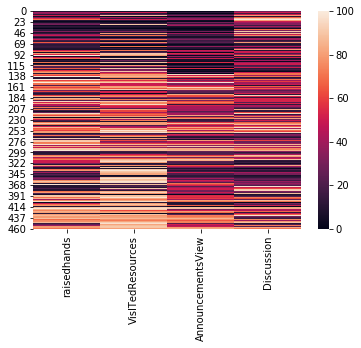

In [12]:
sns.heatmap(integers,linewidths=0,linecolor='red',)

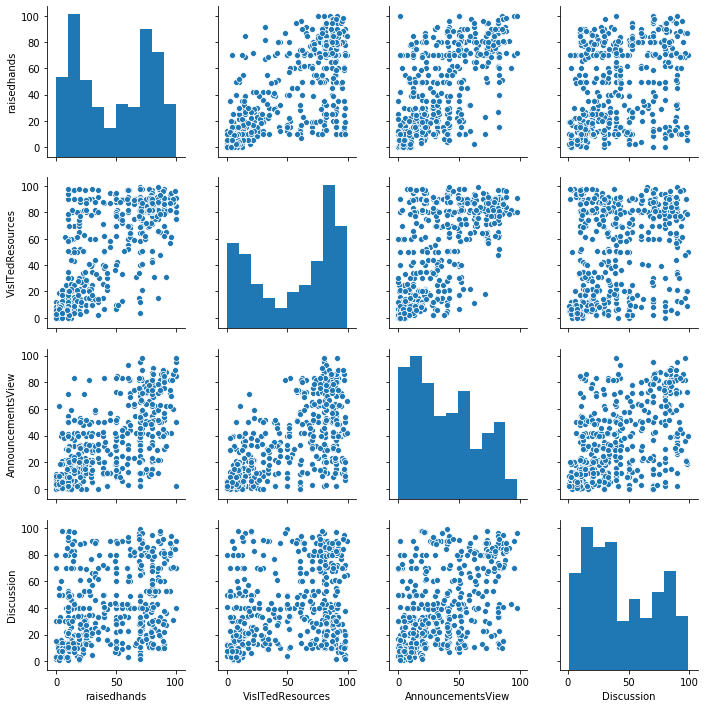

In [13]:
import seaborn as sns
sns.pairplot(integers)

In [14]:
categorical_features = df.select_dtypes(include=object)

In [15]:
categorical_features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


## chi_square Test

In [16]:
a = pd.crosstab(categorical_features['ParentAnsweringSurvey'],categorical_features['Class'])
a

Class,H,L,M
ParentAnsweringSurvey,,,
No,28,99,83
Yes,114,28,128


In [17]:
from scipy.stats import chi2_contingency


In [19]:
stat, p, dof, expected = chi2_contingency(a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('dependent categories')
else:
    print('independent categories')

stat=95.365, p=0.000
independent categories


In [26]:
categorical_features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [29]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
categorical_features = categorical_features.apply(sc.fit_transform)
categorical_features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [30]:
X = categorical_features.iloc[:,:-1]
y = categorical_features.iloc[:,-1]

In [31]:
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,1,1,1
1,1,4,4,2,1,0,7,0,0,1,1,1
2,1,4,4,2,1,0,7,0,0,0,0,0
3,1,4,4,2,1,0,7,0,0,0,0,0
4,1,4,4,2,1,0,7,0,0,0,0,0


In [32]:
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32

In [33]:
from sklearn.feature_selection import chi2
chi_score = chi2(X,y)

In [34]:
chi_score

(array([12.15019023,  6.95502702,  9.75721839,  1.36112198,  7.18665588,
         0.51585055, 13.90388171,  3.99229972, 47.97176733, 41.72203414,
        26.81722745, 89.6127511 ]),
 array([2.29942746e-03, 3.08841086e-02, 7.60758735e-03, 5.06332865e-01,
        2.75066375e-02, 7.72652965e-01, 9.56776387e-04, 1.35857347e-01,
        3.82880351e-11, 8.71315417e-10, 1.50214912e-06, 3.47406824e-20]))

In [37]:
p_value1 = chi_score[1]

In [38]:
p_value1

array([2.29942746e-03, 3.08841086e-02, 7.60758735e-03, 5.06332865e-01,
       2.75066375e-02, 7.72652965e-01, 9.56776387e-04, 1.35857347e-01,
       3.82880351e-11, 8.71315417e-10, 1.50214912e-06, 3.47406824e-20])

In [39]:
p_value = pd.Series(chi_score[1],index=X.columns)

In [45]:
p_value

gender                      2.299427e-03
NationalITy                 3.088411e-02
PlaceofBirth                7.607587e-03
StageID                     5.063329e-01
GradeID                     2.750664e-02
SectionID                   7.726530e-01
Topic                       9.567764e-04
Semester                    1.358573e-01
Relation                    3.828804e-11
ParentAnsweringSurvey       8.713154e-10
ParentschoolSatisfaction    1.502149e-06
StudentAbsenceDays          3.474068e-20
dtype: float64

In [48]:
p_value.sort_values(ascending = False,inplace=True)

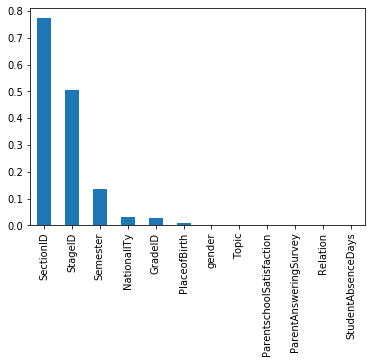

In [49]:
p_value.plot.bar()

In [61]:
alpha = 0.05
for i in p_value:
    if i > alpha:
        print(i)
    else:
        print('independent_values')
    

0.7726529645952364
0.5063328650084061
0.1358573471815014
independent_values
independent_values
independent_values
independent_values
independent_values
independent_values
independent_values
independent_values
independent_values


## T-test(1-sample T-test)

In [63]:
a=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [64]:
len(a)

32

In [65]:
import numpy as np
a_mean = np.mean(a)

In [66]:
a_mean

30.34375

In [67]:
sample_size=10

In [68]:
b = np.random.choice(a,sample_size)

In [69]:
b

array([17, 28, 65, 26, 43, 20, 26, 55, 21, 18])

In [70]:
from scipy.stats import ttest_1samp

In [72]:
ttest,p_value = ttest_1samp(b,30)

In [73]:
p_value

0.727458826904728

In [76]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

dependent_values


###  Independent _ sample

In [77]:
my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]

In [78]:
from scipy.stats import ttest_ind
ttest ,p_value = ttest_ind(my_score,virat_score)

In [79]:
p_value

7.3390410384768156e-06

In [80]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


In [81]:
my_score_second_Tour = [46,42,62,40,38,70,52,44,42,38]

In [83]:
from scipy.stats import ttest_rel
ttest , p_value = ttest_rel(my_score,my_score_second_Tour)

In [84]:
p_value

2.1983272300073563e-07

In [85]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


## pointbiserialr



In [110]:
# used to check the relation between one categorical and  numerical features

from scipy.stats import pointbiserialr


In [111]:
a = pointbiserialr(integers.AnnouncementsView,y)

In [112]:
a

PointbiserialrResult(correlation=-0.1439958999662883, pvalue=0.0015611683154396266)

In [113]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


In [115]:
b = pointbiserialr(integers.raisedhands,y)
b

PointbiserialrResult(correlation=-0.23101578434712627, pvalue=3.096280642820022e-07)

In [116]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


In [118]:
c = pointbiserialr(integers.VisITedResources,y)
c

PointbiserialrResult(correlation=-0.1617480215704172, pvalue=0.0003737784433080825)

In [119]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


In [120]:
d = pointbiserialr(integers.Discussion,y)
d

PointbiserialrResult(correlation=-0.12197106866705337, pvalue=0.007466682873850967)

In [121]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values


## Anova test

In [122]:
import seaborn as sns
digit = sns.load_dataset('iris')
digit.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
digit.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [126]:
df = digit[['petal_width','species']]

In [127]:
df.head()

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa


In [128]:
a = df.species.unique()

In [129]:
a

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [137]:
con = {i:df['petal_width'][df.species == i] for i in a}

In [138]:
con

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64, 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85   

In [150]:
from scipy.stats import f_oneway

In [154]:
F_value, p_value = f_oneway(con['setosa'], con['versicolor'], con['virginica'])

In [155]:
p_value

4.169445839443116e-85

In [156]:
alpha = 0.05
if p_value > alpha:
    print('dependent_values')
else:
    print("independent_values")

independent_values
